In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [14]:
cdf = df[
    [
        "ENGINESIZE",
        "CYLINDERS",
        "FUELCONSUMPTION_CITY",
        "CO2EMISSIONS",
    ]
]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244


In [20]:
cdf["merged_column"] = cdf["ENGINESIZE"] + cdf["FUELCONSUMPTION_CITY"]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS,merged_column
0,2.0,4,9.9,196,11.9
1,2.4,4,11.2,221,13.6
2,1.5,4,6.0,136,7.5
3,3.5,6,12.7,255,16.2
4,3.5,6,12.1,244,15.6


In [21]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(msk)
print(~msk)
print(cdf)
print(train)
print(test)

[ True  True False ... False False  True]
[False False  True ...  True  True False]
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  CO2EMISSIONS  merged_column
0            2.0          4                   9.9           196           11.9
1            2.4          4                  11.2           221           13.6
2            1.5          4                   6.0           136            7.5
3            3.5          6                  12.7           255           16.2
4            3.5          6                  12.1           244           15.6
...          ...        ...                   ...           ...            ...
1062         3.0          6                  13.4           271           16.4
1063         3.2          6                  13.2           264           16.4
1064         3.0          6                  13.4           271           16.4
1065         3.2          6                  12.9           260           16.1
1066         3.2          6                  14

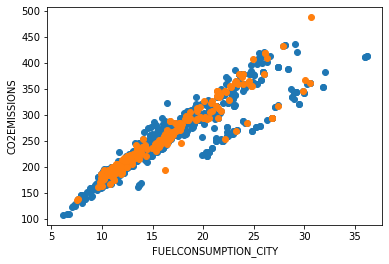

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(train.merged_column, train.CO2EMISSIONS)
ax1.scatter(test.merged_column, test.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [24]:
from sklearn import linear_model

In [28]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["merged_column"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficients:  [[10.72933428]]
Intercept:  [76.58265739]


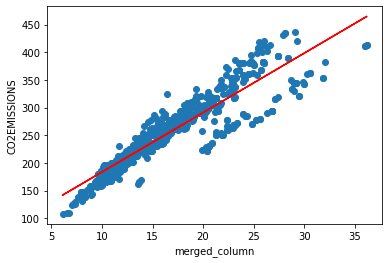

In [29]:
plt.scatter(train.merged_column, train.CO2EMISSIONS)
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], "r")
plt.xlabel("merged_column")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [30]:
from sklearn.metrics import r2_score

In [31]:
test_x = np.asanyarray(test[["merged_column"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

In [35]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 16.24
Residual sum of squares (MSE): 533.20
R2-score: 0.87
